# Data Visualization

Visual data exploration is often useful to have an initial understanding of how values are distributed.

This notebook covers several types of plots:

- line plot
- scatter plot
- histogram
- profile plot
- pie chart
- hexbin plot
- pairwise plots

We will try functionalities from 3 different packages: 

- matplotlib  http://matplotlib.org
- pandas http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
- seaborn http://seaborn.pydata.org

Most of the things can be done with either of those packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
data = np.random.normal(0, 0.01, 1000)

## Matplotlib plotting

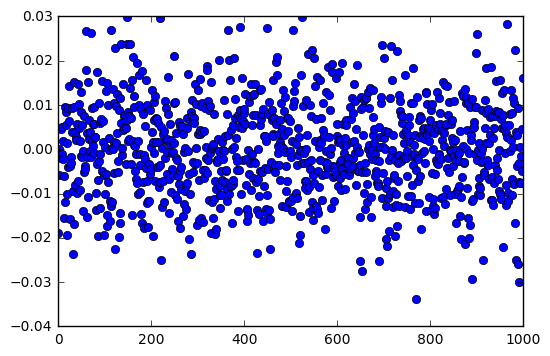

In [4]:
plt.plot(data, 'o')

Interactive plotting

In [5]:
%matplotlib notebook

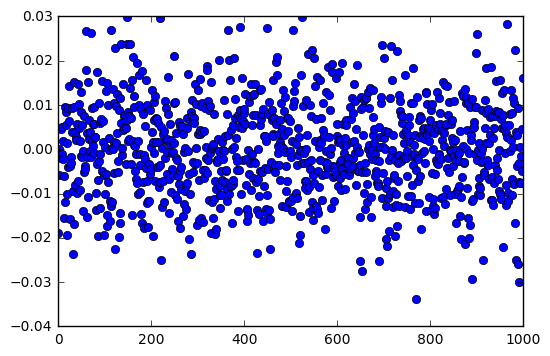

In [8]:
plt.plot(data, 'o')

In [7]:
%matplotlib inline

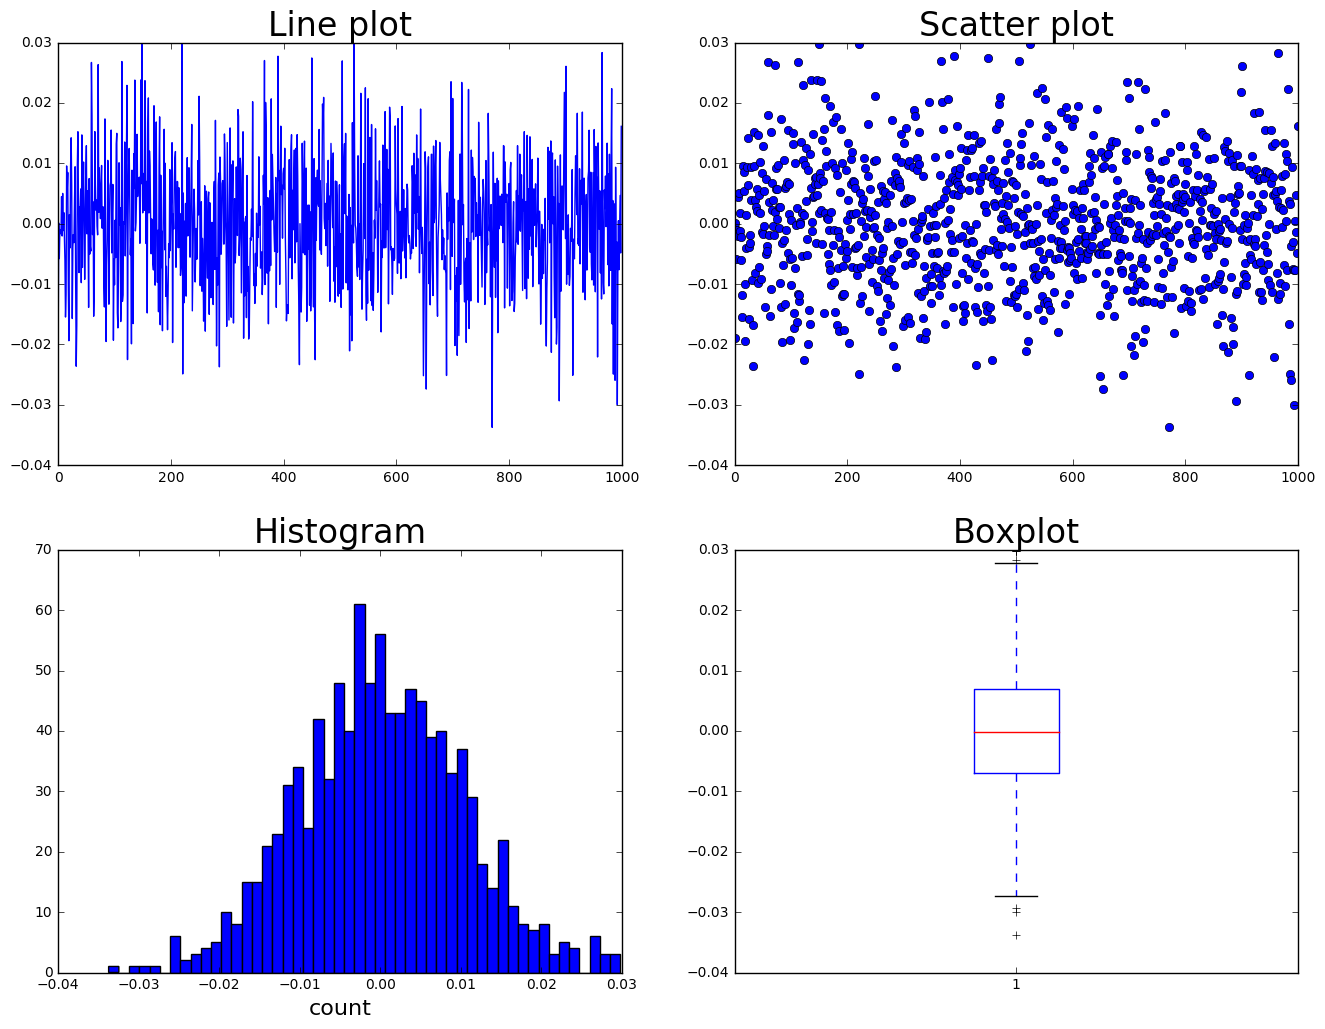

In [9]:
fig = plt.figure(figsize=(16,12))

ax = fig.add_subplot(2,2,1)
ax.plot(data)
ax.set_title('Line plot', size=24)

ax = fig.add_subplot(2,2,2)
ax.plot(data, 'o')
ax.set_title('Scatter plot', size=24)

ax = fig.add_subplot(2,2,3)
ax.hist(data, bins=50)
ax.set_title('Histogram', size=24)
ax.set_xlabel('count', size=16)

ax = fig.add_subplot(2,2,4)
ax.boxplot(data)
ax.set_title('Boxplot', size=24)

## Pandas plotting

In [10]:
dataseries = pd.Series(data)

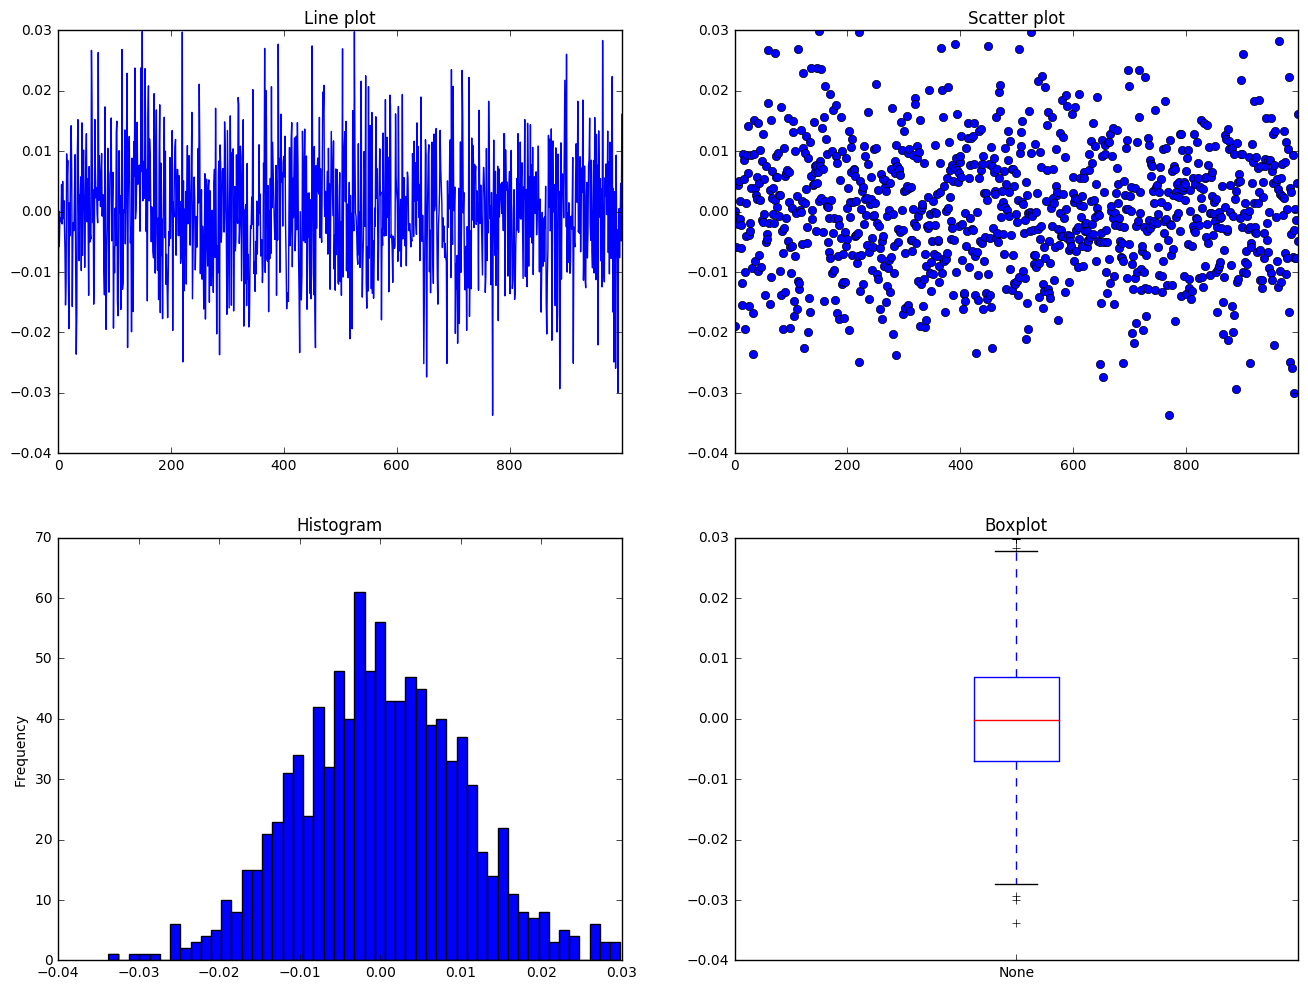

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(16,12))

dataseries.plot(ax=ax[0][0],
                title='Line plot')

dataseries.plot(ax=ax[0][1],
                style='o',
                title='Scatter plot')

dataseries.plot(ax=ax[1][0],
                kind='hist',
                bins=50,
                title='Histogram'
               )

dataseries.plot(ax=ax[1][1],
                kind='box',
                title='Boxplot'
               )

## Seaborn plots

generic series plotting

In [12]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "prendiamo una parola a caso: Bosone di Higgs")))

In [13]:
x = np.random.normal(size=100)

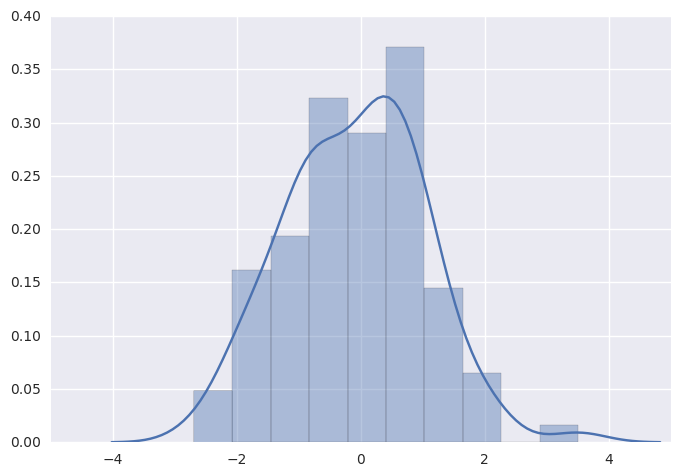

In [14]:
sns.distplot(x)

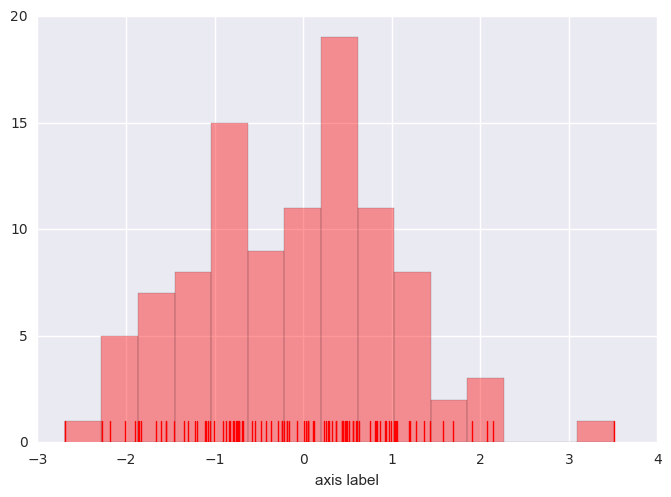

In [15]:
sns.distplot(x, bins=15, hist=True, kde=False, rug=True, color='red',axlabel='axis label');

### fitting parametric distributions

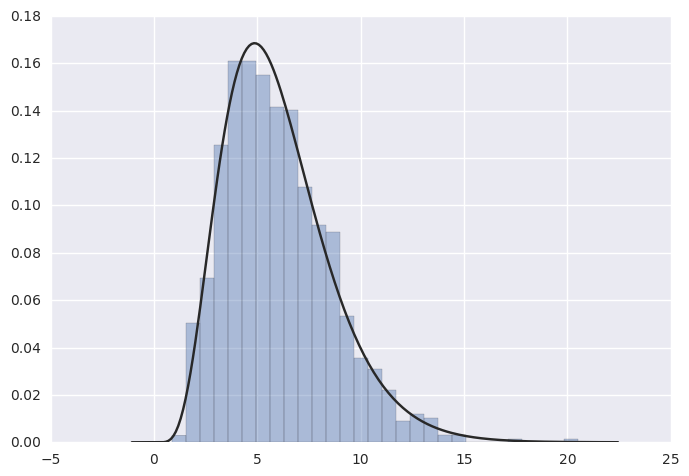

In [16]:
x = np.random.gamma(6, size=1000)
sns.distplot(x, kde=False, fit=stats.gamma);

In [17]:
stats.gamma.fit(x)

(4.9846202217318147, 0.2356672293062077, 1.1613096498954654)

### Bidimensional distributions

In [18]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


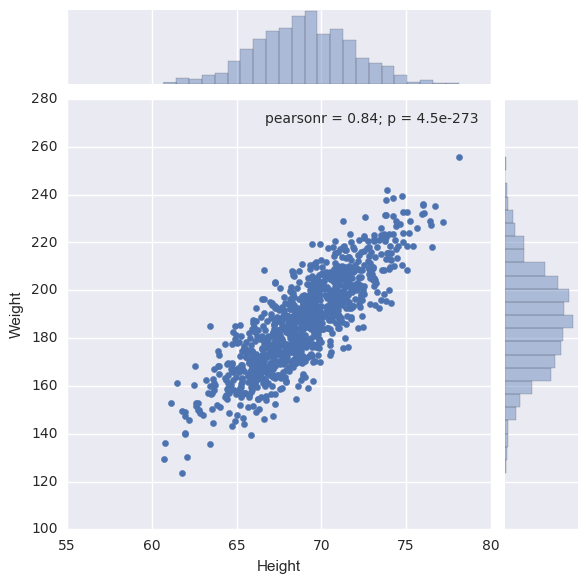

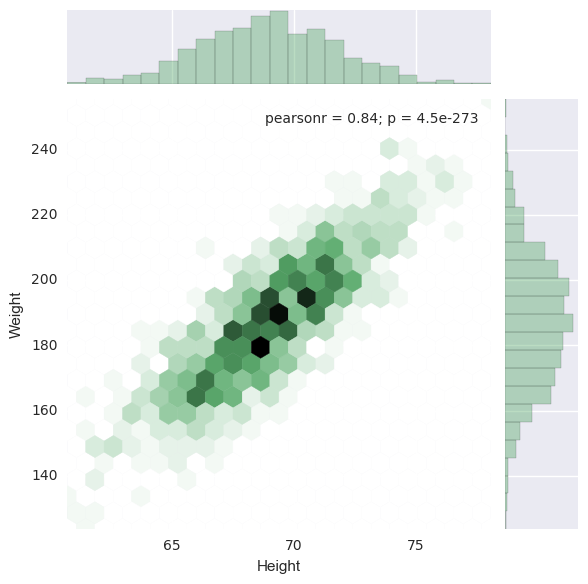

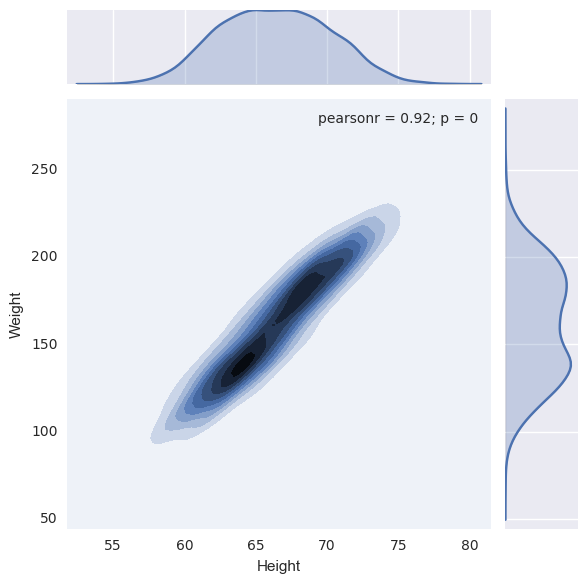

In [19]:
sns.jointplot(x="Height", y="Weight",data=df[0:1000]);
sns.jointplot(x="Height", y="Weight", kind='hex',color='g',data=df[0:1000]);
sns.jointplot(x="Height", y="Weight", data=df[0:10000], kind="kde");


In [21]:
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']

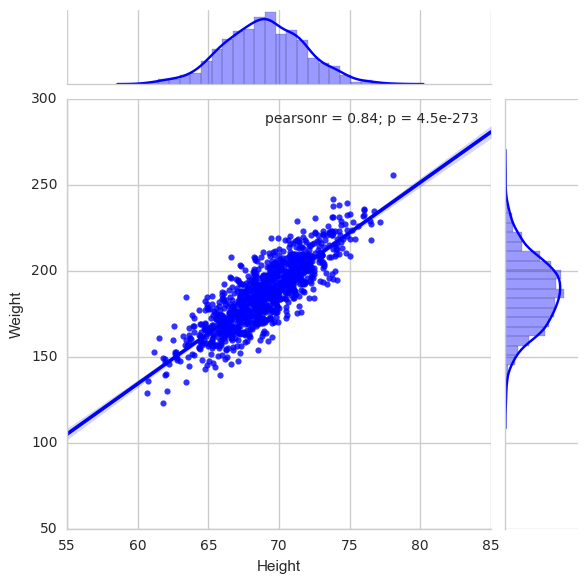

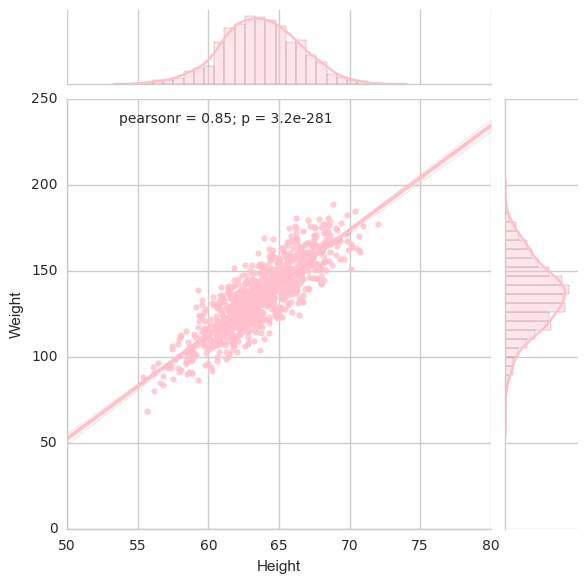

In [22]:
with sns.axes_style("whitegrid"): 
    sns.jointplot(x="Height", y="Weight",data=males[0:1000], color='blue', kind='reg');
    sns.jointplot(x="Height", y="Weight",data=females[0:1000], color='pink', kind='reg');

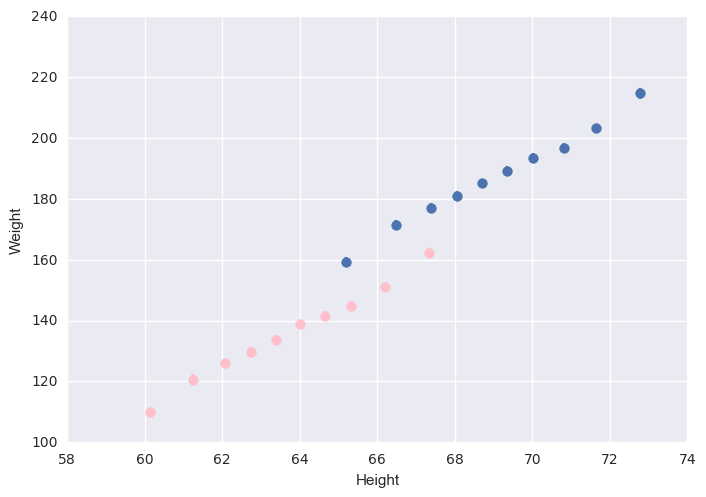

In [23]:
fig, ax = plt.subplots()
sns.regplot(x=males['Height'],
            y=males['Weight'],
            x_bins=10, fit_reg=None, ax=ax)
sns.regplot(x=females['Height'],
            y=females['Weight'],
            x_bins=10, fit_reg=None, ax=ax, color='pink')

### Visualizing pairwise relationships in a dataset

Load a predefined dataset (flowers features) and plot its features pairwise 

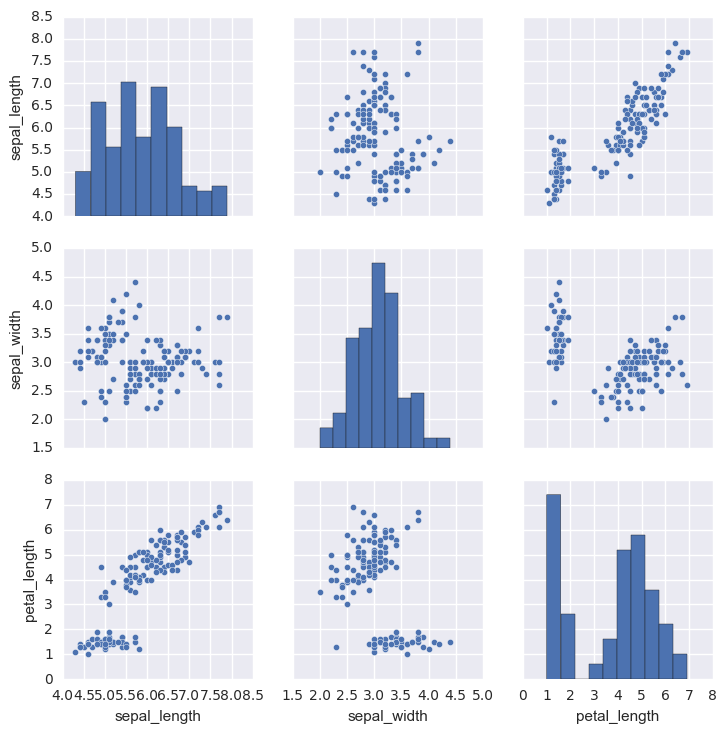

In [24]:
iris = sns.load_dataset("iris")
sns.pairplot(iris,vars=["sepal_length","sepal_width","petal_length"]);

## Exercises:

1)
- with the weight-height dataset (data/weight-height.csv)
- plot the male and female population separately in the same a scatter plot
- addn a legenda
- plot a vertical line at the mean using axvline

2)
- load the dataset: data/international-airline-passengers.csv
- inspect it using the .info() and .head() commands
- set the index to be a datetime index using the set_index() and to_datetime() methods
- choose the appropriate plot and display the data
- choose appropriate scale
- label the axes

3)
- load the dataset: data/titanic-train.csv
- inspect it and display the relevant features
- play with the kde and rug plots
- play with the scatter matrix 
